## Produccion hidrocarbiros primer trimestre 2024 Argentina

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


# data
d2024 = pd.read_csv('data\produccin-de-pozos-de-gas-y-petrleo-2024.csv', low_memory=False)

### Exploracion de datos

In [2]:
pd.set_option('display.max_columns', None)
d2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,145622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.DJ.x-2,PROS,2402.0,punta rosada,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,145624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.GR.x-2,FIMP,2507.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.GR.x-5,FIMP,2707.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
4,Z001,2024,1,145623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plunger Lift,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.G.x-1,FIMP,2500.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


In [3]:
d2024.isna().sum()

idempresa                      0
anio                           0
mes                            0
idpozo                         0
prod_pet                       0
prod_gas                       0
prod_agua                      0
iny_agua                       0
iny_gas                        0
iny_co2                        0
iny_otro                       0
tef                            0
vida_util                 237292
tipoextraccion                10
tipoestado                    10
tipopozo                      10
observaciones             227177
fechaingreso                   0
rectificado                    0
habilitado                     0
idusuario                      0
empresa                        0
sigla                          0
formprod                    8040
profundidad                    0
formacion                   8379
idareapermisoconcesion         0
areapermisoconcesion           0
idareayacimiento               0
areayacimiento                 0
cuenca    

In [4]:
d2024.shape

(242437, 38)

### Limpieza de datos

In [5]:
# Limpieza de df
useful_columns = d2024[['anio','mes','idpozo','prod_pet','prod_gas','prod_agua','iny_agua','iny_gas','iny_co2','iny_otro','tipoextraccion','tipoestado','tipopozo','empresa','profundidad','cuenca','provincia','fecha_data']]
my_dataframe = useful_columns.dropna()
# Elimino estos datos por comodidad al graficar, ya que solo representan el 0.8% del total
my_dataframe = my_dataframe[(my_dataframe['provincia']!='Estado Nacional') & (my_dataframe['provincia']!='Jujuy') & (my_dataframe['provincia']!='Formosa')]
# Sub df para Mes, tipoEstado 
unique_mes = my_dataframe['mes'].unique()
sub_mes = {}
for n in unique_mes:
    sub_mes[n] = my_dataframe.loc[my_dataframe['mes'] == n]

In [6]:
# Seteo de meses
mes1 = sub_mes[1] 
mes2 = sub_mes[2]
mes3 = sub_mes[3]

##### Marzo

In [7]:
# Desglose mes de marzo 
# Activos
activos = mes3[(mes3['tipoestado']=='Extracción Efectiva') | (mes3['tipoestado']=="En Inyección Efectiva")]

### Analisis

##### Cantidad de pozos por provicia

In [8]:
# df para la gracica
data = mes3[['provincia','tipoestado']]
pozos_por_provincia = data.pivot_table(index='provincia', columns='tipoestado', aggfunc='size', fill_value=0)
# instancia figura
fig = go.Figure()
# Añado un barra para cada tipo
for tipoestado in pozos_por_provincia.columns:
    fig.add_trace(go.Bar( 
        x=pozos_por_provincia.index, #provincias 
        y=pozos_por_provincia[tipoestado],
        name=tipoestado
        ))
# Diseño del grafico
fig.update_layout(
    barmode='stack',
    title='Total de pozos por provincia',
    xaxis=dict(title='Provincia'),
    yaxis=dict(title='Cantidad'),
    legend=dict(title='Tipo Estado')
)
# Show
fig.show()

Tabla con los datos presentados en la grafica anterior

In [9]:
sumatoria = pozos_por_provincia.sum(axis=1) 
pozos_por_provincia.insert(0,'Totales', sumatoria)
pozos_por_provincia

tipoestado,Totales,A Abandonar,Abandonado,Abandono Temporario,En Espera de Reparación,En Estudio,En Inyección Efectiva,En Reparación,En Reserva de Gas,En Reserva para Recup. Sec./Asist.,Extracción Efectiva,Mantenimiento de Presión,Otras Situación Activo,Otras Situación Inactivo,Parado Alta Relación Agua/Petróleo,Parado Alta Relación Gas/Petróleo,Parado Transitoriamente
provincia,,,,,,,,,,,,,,,,,
Chubut,20911,583,6103,57,231,1388,2103,14,72,2678,6666,0,42,109,99,49,717
La Pampa,2687,14,280,21,139,155,225,0,3,2,1493,0,0,3,18,3,331
Mendoza,8556,640,1874,39,277,614,913,1,120,409,2778,3,4,36,385,9,454
Neuquén,17799,564,3119,51,657,2405,1067,19,187,948,6503,10,151,148,197,15,1758
Rio Negro,3639,112,1140,28,143,371,265,3,10,80,1052,2,6,51,195,3,178
Salta,894,72,530,3,0,88,11,0,0,0,61,10,0,17,1,1,100
Santa Cruz,23432,739,4771,1181,376,2311,1473,1,118,3469,7399,17,1,417,81,18,1060
Tierra del Fuego,1235,15,412,12,32,111,24,0,47,211,226,0,1,63,2,2,77


#### Total de pozos no abandonados por provincia

In [10]:
# Eliminamos abandonados
total_pozos_no_abandonados = pozos_por_provincia.drop(columns=['Abandonado','Totales'])
# Sumamos los totales de los pozos en cada provincia
totales = total_pozos_no_abandonados.sum(axis=1)

# Presentacion, Instancia de Figure
fig = go.Figure(
    data=[go.Pie(
        labels=totales.index,
        values=totales,
        hoverinfo='label+percent',
        textinfo='value+percent',
        textfont=dict(size=15),
    )]
)
fig.update_layout(
    title='Distribucion de pozos No abandonados por Provincia'
)
fig.show()

In [11]:
totales
# Cuadro de los pozos totales por provincia
total_pozos_no_abandonados.insert(0, 'Totales', totales)
total_pozos_no_abandonados

tipoestado,Totales,A Abandonar,Abandono Temporario,En Espera de Reparación,En Estudio,En Inyección Efectiva,En Reparación,En Reserva de Gas,En Reserva para Recup. Sec./Asist.,Extracción Efectiva,Mantenimiento de Presión,Otras Situación Activo,Otras Situación Inactivo,Parado Alta Relación Agua/Petróleo,Parado Alta Relación Gas/Petróleo,Parado Transitoriamente
provincia,,,,,,,,,,,,,,,,
Chubut,14808,583,57,231,1388,2103,14,72,2678,6666,0,42,109,99,49,717
La Pampa,2407,14,21,139,155,225,0,3,2,1493,0,0,3,18,3,331
Mendoza,6682,640,39,277,614,913,1,120,409,2778,3,4,36,385,9,454
Neuquén,14680,564,51,657,2405,1067,19,187,948,6503,10,151,148,197,15,1758
Rio Negro,2499,112,28,143,371,265,3,10,80,1052,2,6,51,195,3,178
Salta,364,72,3,0,88,11,0,0,0,61,10,0,17,1,1,100
Santa Cruz,18661,739,1181,376,2311,1473,1,118,3469,7399,17,1,417,81,18,1060
Tierra del Fuego,823,15,12,32,111,24,0,47,211,226,0,1,63,2,2,77


Los ***Pozos activos*** por provincia 

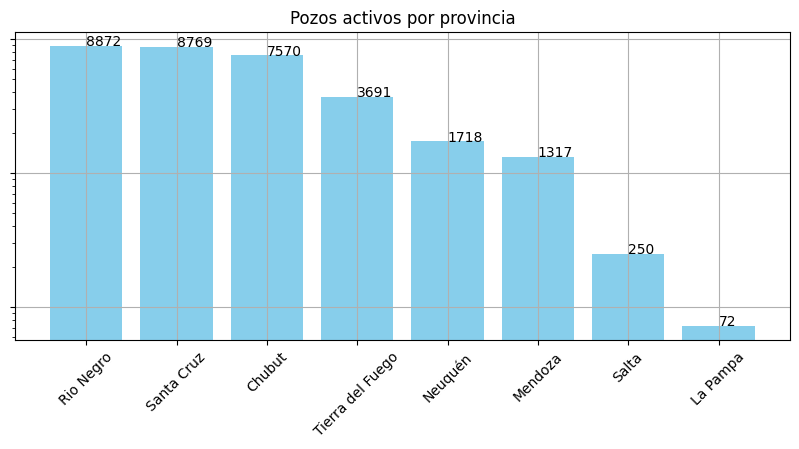

In [12]:
#Cantidad pozos activos por provincia 
from matplotlib.ticker import NullFormatter
# data
x = activos['provincia'].unique()
y = activos['provincia'].value_counts()

# Creacion grafico
fig, ax = plt.subplots(figsize=(10,4))
bars = ax.bar(x,y, color='skyblue')
# Grafico logarítmico 
ax.set_yscale('log')
ax.yaxis.set_major_formatter(NullFormatter())
ax.grid()
# agregado del valor entero de cada provincia
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval,int(yval))
# Arreglos
plt.xticks(rotation=45)
plt.title('Pozos activos por provincia')
plt.show()

#### Produccion petroleo, gas, agua por provincia

In [13]:
# Dataframe
prod_prov = activos.groupby('provincia')[['prod_pet','prod_gas','prod_agua']].sum().round(2)
prod_prov
# Instancia de la figura
fig = go.Figure()
# Creacion de los trazos
for column in prod_prov.columns:
    fig.add_trace(go.Bar(
        x=prod_prov.index,
        y=prod_prov[column],
        name=column
    ))
fig.update_layout(
    barmode='stack',
    title='Producción por Provincia',
    xaxis_title='Provincia',
    yaxis_title='Producción',
    legend_title='Tipo de Producción',
)
# Mostrar el gráfico
fig.show()

Inyeccion de agua, co2, gas por provincia

In [14]:
# Dataframe 
iny_prod = activos.groupby('provincia')[['iny_agua','iny_gas','iny_otro']].sum().round(2)
iny_prod

fig = go.Figure()
for column in iny_prod.columns:
    fig.add_trace(go.Bar(
        x=iny_prod.index,
        y=iny_prod[column],
        name=column
    ))
fig.update_layout(
    barmode='stack',
    title='Inyección por Provincia',
    xaxis_title='Provincia',
    yaxis_title='Inyección',
    legend_title='Tipo de Inyección'
)
fig.show()

Como podemos observar la inyección de agua es por mucho el que tiene mayor volumen.

Empresas con mayor produccion

In [15]:
# DataFrame
prod_emp = mes3.groupby('empresa')[['prod_pet','prod_gas','prod_agua']]
# Ordenamiento 
data_group = prod_emp.sum().reset_index().round(2).sort_values(by='prod_pet', ascending=False, ignore_index=True).head(7)
# Figura
fig = go.Figure()

fig.add_trace(go.Bar(
    x=data_group['empresa'],
    y=data_group['prod_pet'],
    name='Producción de Petróleo'
))
fig.add_trace(go.Bar(
    x=data_group['empresa'],
    y=data_group['prod_gas'],
    name='Producción de Gas'
))

fig.update_layout(
    barmode='stack',
    title='Producción de Petróleo, Gas y Agua por Empresa',
    xaxis_title='Empresa',
    yaxis_title='Producción',
    legend_title='Tipo de Producción'
)
fig.show()
# Nota: Se excluyen los valores de prod_agua por la generacion de ruido del mismo.


Cuenca con mayor produccion

In [16]:
# DataFrame
cuenca = mes3.groupby('cuenca')[['prod_pet', 'prod_gas', 'prod_agua']]
# Ordenamiento
sort_data = cuenca.sum().reset_index().round(2).sort_values(by='prod_pet', ascending=False, ignore_index=True).head(5)
# Figura
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sort_data['cuenca'],
    y=sort_data['prod_pet'],
    name='Producción de Petróleo'
))
fig.add_trace(go.Bar(
    x=sort_data['cuenca'],
    y=sort_data['prod_gas'],
    name='Producción de Gas'
))

fig.update_layout(
    barmode='stack',
    title='Producción de Petróleo y Gas por cuenca',
    xaxis_title='Cuenca',
    yaxis_title='Producción',
    legend_title='Tipo de Producción'
)
fig.show()
# Hay dos cuencas las cuales no tienen produccion el mes de marzo por lo cual son excluidas

Tipo de extraccion mas frecuente por cuenca

In [17]:
#El tipo de extraccion mas frecuente en pozos activos es:
ext_frec = activos['tipoextraccion'].value_counts()
ext_frec

tipoextraccion
Bombeo Mecánico              13031
Sin Sistema de Extracción     6084
Surgencia Natural             4121
Electrosumergible             3742
Cavidad Progresiva            3628
Plunger Lift                   788
Pistoneo (Swabbing)            492
Gas Lift                       340
Otros Tipos de Extracción       24
Jet Pump                         7
Bombeo Hidráulico                2
Name: count, dtype: int64

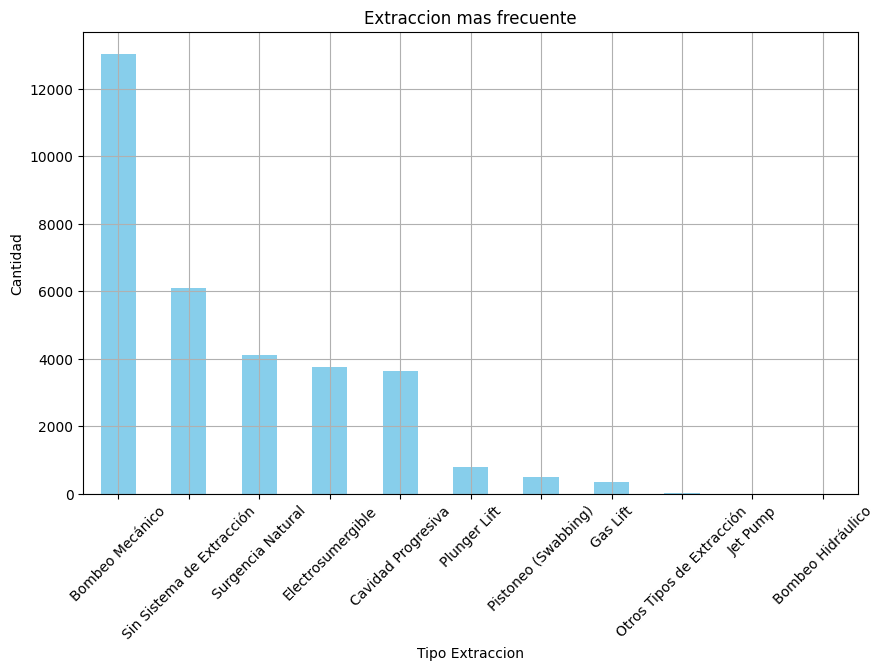

In [18]:
ext_frec.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Extraccion mas frecuente')
plt.xlabel('Tipo Extraccion')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid()
plt.show()